# Image processing (30 minutes)
ACPSEM Machine Learning Workshop 2019, 29 - 31 May 2019

Yu Sun, yu.sun@sydney.edu.au

University of Sydney

In this session, we will go through the steps of imaging preprocessing and feature extraction. First, let's look at how to read in the image data into Python.

## About this environment (5 minutes)
This is a document-based development environment, which combines the documentation and the experiment. A document consisits of a number of cells. There are two types of cells, code and text. This is a text cell.

In a text cell, you can use the markdown to write strucutred text. To know more about markdown, check [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

You can also use $\LaTeX$ for mathematical expressions, such as

$$E=mc^2$$

A code cell is where you type and execute the code, like the one below.

In [0]:
# This is a code cell
# Type and run the Python code here
# Hit ctrl (cmd) + Enter to run
print('Machine learning is cool.')

Machine learning is cool.


In [0]:
# You can also run shell command, starting with a !
! ls -la

total 16
drwxr-xr-x 1 root root 4096 May 22 16:22 .
drwxr-xr-x 1 root root 4096 May 26 04:49 ..
drwxr-xr-x 1 root root 4096 May 23 16:08 .config
drwxr-xr-x 1 root root 4096 May 22 16:22 sample_data


## Reading images (10 minutes)
The most commonly used packages for medical imaging data includes
* `pydicom` for DICOM files;
* `nibabel` for NIfTI files;

Let demonstrate this using a NIfTI file. Download the `ProstateX-0000.nii` in the Google Drive to your local computer and then upload it to the cloud server using the left hand panel.

(Data source: [PROSTATEx](https://prostatex.grand-challenge.org/)) 


In [0]:
# Import the nibabl library to read NIfTI file
import nibabel

# Read the image
nft = nibabel.load('ProstateX-0000.nii')

In [0]:
# Get the shape of the data
print(nft.shape)

(384, 384, 19)


In [0]:
# Have a look at the header
print(nft.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 384 384  19   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.5       0.5       3.0000021 0.        0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : -0.0006202684
quatern_c       : -0.16066042
quatern_d       : 0.9870095
qoffset_x       : 57.685436
qoffset_y       : 8

In [0]:
# View one slice of the image
# First import the library: matplotlib.pyplot
import matplotlib.pyplot as plt

# Define the function to show an image
def showImg(arr, title='Title'): 
    plt.imshow(arr, cmap='gray') 
    plt.xticks([])
    plt.yticks([])
    plt.colorbar() 
    plt.title(title)
    plt.show()

In [0]:
# Get a slice (11-th) from the NIfTI object
img = nft.get_data()[:,:,10].T.copy()

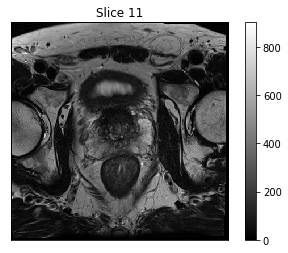

In [0]:
# Show the slice
# The first line of code tells Jupyter Notebook to 
#   embed the plot in the document, not in a pop-up window
%matplotlib inline     
showImg(img, 'Slice 11')

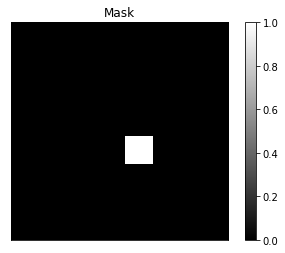

In [0]:
# Create a mask
import numpy as np
mask = np.zeros(shape=img.shape, dtype=np.uint8)

# Create a rectanglar shape
mask[200:250, 200:250] = 1

# Show the mask
showImg(mask, 'Mask')

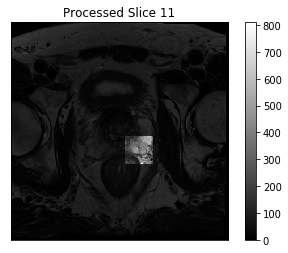

In [0]:
# Use the mask to manipulate part of the img
img[mask==0] = img[mask==0] / 4
showImg(img, 'Processed Slice 11')

In [0]:
# Insert the processed data back to the NIfTI object
nft.get_data()[:,:,10] = img.T

In [0]:
# Save the process NIfTI
nibabel.save(filename='prostate_processed.nii', img=nft)

# Now check your folder to confirm the file is saved
# Read the file in 3D Slicer to view the effect

In [0]:
! ls -la

total 10968
drwxr-xr-x 1 root root    4096 May 26 05:03 .
drwxr-xr-x 1 root root    4096 May 26 04:49 ..
drwxr-xr-x 1 root root    4096 May 23 16:08 .config
-rw-r--r-- 1 root root 5603680 May 26 05:03 prostate_processed.nii
-rw-r--r-- 1 root root 5603680 May 26 05:00 ProstateX-0000.nii
drwxr-xr-x 1 root root    4096 May 22 16:22 sample_data


You can download the `prostate_processed.nii` to you local computer and see the modified data. 

Exercise:
* Get a different slice from the NIfTI file;
* Display the image;
* Set its value to all zero;
* Insert it back to the NIfTI file;
* Save the file as `prostate_zero.nii`.

In [0]:
# Your code goes here





## Feature extraction (15 minutes)
As an example, we will look at the Canny edge detector and the GLCM features. We will keep working on the `ProstateX-0000.nii` file.

### Canny edge detection

In [0]:
# Read the raw data again
nft = nibabel.load('ProstateX-0000.nii')
img = nft.get_data()[:,:,10].T.copy()

# Normalise the image
img = img / img.max()

In [0]:
# Import relevant functions from the scikit-image library
from skimage import io, feature

In [0]:
# Perform the Canny edge detector
edge = feature.canny(img, sigma=2)

In [0]:
# Check the result
print("Feature map data type: %s, shape: %s" % (edge.dtype, edge.shape))

Feature map data type: bool, shape: (384, 384)


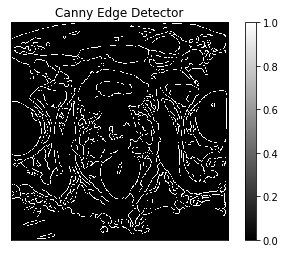

In [0]:
# Show the edges
showImg(edge.astype(np.float32), 'Canny Edge Detector')

Now change the `sigma` in the `feature.canny()` to the following values: 1.5, 1.0, 0.5, 0.2 and 0.1. What pattern do you find?

In [0]:
# Your code goes here





### GLCM-based featuers
Compute the GLCM for the following matrix in any two directions on a paper.

$$\begin{bmatrix} 4 & 3 & 5 & 4 & 5 \\ 5 & 5 & 1 & 4 & 4 \\ 3 & 4 & 1 & 1 & 4 \\ 4 & 2 & 5 & 2 & 2 \\ 2 & 3 & 5 & 2 & 4 \\ \end{bmatrix}$$

In [0]:
# Check you answer using Python
# Define the patch
patch = np.array([[4, 3, 5, 4, 5],
                  [5, 5, 1, 4, 4],
                  [3, 4, 1, 1, 4],
                  [4, 2, 5, 2, 2],
                  [2, 3, 5, 2, 4]])

# Compute the GLCM in 0 direction
glcm0 = feature.greycomatrix(patch, distances=[1], angles=[0], 
                             levels=patch.max()+1, symmetric=True)
glcm0 = glcm0.reshape((patch.max()+1,patch.max()+1))
print(glcm0)

[[0 0 0 0 0 0]
 [0 2 0 0 3 1]
 [0 0 2 1 2 3]
 [0 0 1 0 2 2]
 [0 3 2 2 2 2]
 [0 1 3 2 2 2]]


Compute the other three directions by changing the angles (in radians) argument.

In [0]:
# Your code goes here





In [0]:
# Print the session information for reproducibility purposes
import IPython
print(IPython.sys_info())



---

This is the end of this session.